## Tobigs 3주차 KNN 과제
#### 15기 이윤정
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1000837,P00147942,M,55+,7,C,1,1,1,16.0,NaN,11701
4994,1000293,P00358242,M,55+,1,C,1,1,8,NaN,NaN,2045
4995,1001908,P00173342,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,1005517,P00336742,M,55+,0,C,2,1,12,NaN,NaN,1413


In [3]:
data.rename(columns={"City_Category" : "City", "Stay_In_Current_City_Years" : "Stay_City", "Product_Category_1" : "Product1", "Product_Category_2" : "Product2", "Product_Category_3" : "Product3"}, inplace=True)

#### 데이터 설명
target feature = Gender  

- User_ID : 고객 ID
- Product_ID : 제품 ID
- Age : 고객 연령대
- Occupation : 고객 직업
- City : 고객 거주 도시
- Stay_City : 현재 도시 거주 기간(년)
- Marital_Status : 결혼 여부
- Product1 : 구매 제품 분류(대)
- Product2 : 구매 제품 분류(중)
- Product3 : 구매 제품 분류(소)
- Purchase : 구매 가격

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         4998 non-null   int64  
 1   Product_ID      4998 non-null   object 
 2   Gender          4998 non-null   object 
 3   Age             4998 non-null   object 
 4   Occupation      4998 non-null   int64  
 5   City            4998 non-null   object 
 6   Stay_City       4998 non-null   object 
 7   Marital_Status  4998 non-null   int64  
 8   Product1        4998 non-null   int64  
 9   Product2        3465 non-null   float64
 10  Product3        1544 non-null   float64
 11  Purchase        4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [5]:
## user_id, product_id는 index와 가깝다고 생각되어 제거!
data = data.drop('User_ID', axis=1)
data = data.drop('Product_ID', axis=1)

In [6]:
data.describe()

,Occupation,Marital_Status,Product1,Product2,Product3,Purchase
count,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [7]:
data.isnull().sum()

Gender               0
Age                  0
Occupation           0
City                 0
Stay_City            0
Marital_Status       0
Product1             0
Product2          1533
Product3          3454
Purchase             0
dtype: int64

---
### target 변수 확인

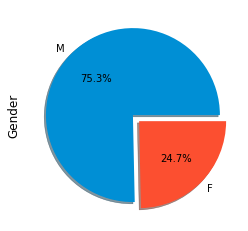

In [8]:
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

여성보다 남성의 비율이 훨씬 높다.

In [9]:
#Gender 변수 0,1로 변환
data['Gender'].replace({'M':0, 'F':1}, inplace=True)
data

,Gender,Age,Occupation,City,Stay_City,Marital_Status,Product1,Product2,Product3,Purchase
0,1,0-17,10,A,3,0,5,17.0,NaN,2010
1,1,0-17,10,A,1,0,7,NaN,NaN,4483
2,1,0-17,10,A,1,0,1,4.0,NaN,7696
3,1,0-17,10,A,3,0,2,4.0,NaN,16429
4,1,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...,...
4993,0,55+,7,C,1,1,1,16.0,NaN,11701
4994,0,55+,1,C,1,1,8,NaN,NaN,2045
4995,0,55+,13,C,3,1,1,6.0,14.0,4505
4996,0,55+,0,C,2,1,12,NaN,NaN,1413


---
### Missing value

In [10]:
#전체 4998개 중 3454개가 결측치인 Product3 변수는 제거한다.
data = data.drop('Product3', axis=1)

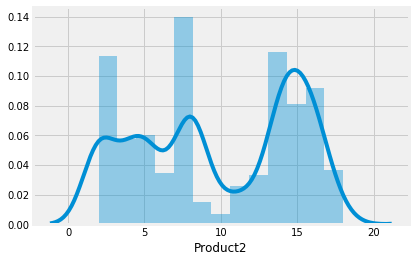

In [11]:
sns.distplot(data['Product2'])

In [12]:
#다봉분포이므로 최빈값 확인
prod_2 = data.groupby('Age')['Product2'].agg(lambda x:x.value_counts().index[0])
prod_2 = dict(prod_2)
print (prod_2)

prod_2 = data.groupby('City')['Product2'].agg(lambda x:x.value_counts().index[0])
prod_2 = dict(prod_2)
print (prod_2)

{'0-17': 4.0, '18-25': 8.0, '26-35': 8.0, '36-45': 8.0, '46-50': 2.0, '51-55': 8.0, '55+': 8.0}
{'A': 8.0, 'B': 8.0, 'C': 8.0}


In [13]:
#최빈값인 8로 결측치 대체
data = data.fillna(8)

Product2 변수의 분포를 살펴본 결과, 다봉분포의 형태를 취하고 있으므로 최빈값으로 결측치를 대체하였다. 이때, Age와 City를 기준으로 해당 변수의 최빈값을 구하였을 때 전 연령, 전 지역에서 최빈값으로 8.0의 값을 구할 수 있었다.

In [14]:
data.describe()

,Gender,Occupation,Marital_Status,Product1,Product2,Purchase
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,0.246699,8.036815,0.421369,5.320128,9.229692,9234.655462
std,0.431133,6.442697,0.493828,3.912281,4.325840,4999.225081
min,0.000000,0.000000,0.000000,1.000000,2.000000,13.000000
25%,0.000000,2.000000,0.000000,1.000000,8.000000,5497.750000
50%,0.000000,7.000000,0.000000,5.000000,8.000000,8049.000000
75%,0.000000,14.000000,1.000000,8.000000,14.000000,12039.000000
max,1.000000,20.000000,1.000000,20.000000,18.000000,23913.000000


---
### Categorical 변수
#### One-Hot encoding

In [15]:
#KNN은 거리기반 알고리즘이므로 원핫인코딩 진행
from sklearn.preprocessing import  OneHotEncoder

category = ['Age', 'Occupation', 'City', 'Stay_City','Marital_Status']
encoder = OneHotEncoder().fit(data[category])
encoder.get_feature_names(category)

endcoded_data = pd.DataFrame(encoder.transform(data[category]).toarray(),index=data.index, columns=encoder.get_feature_names(category))
endcoded_data.head()

,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,...,City_A,City_B,City_C,Stay_City_0,Stay_City_1,Stay_City_2,Stay_City_3,Stay_City_4+,Marital_Status_0,Marital_Status_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
data = pd.concat([data, endcoded_data],sort=False,axis=1)

df=data.drop(category, axis=1)
df

,Gender,Product1,Product2,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,City_A,City_B,City_C,Stay_City_0,Stay_City_1,Stay_City_2,Stay_City_3,Stay_City_4+,Marital_Status_0,Marital_Status_1
0,1,5,17.0,2010,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,7,8.0,4483,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1,4.0,7696,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,4.0,16429,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,3,5.0,5780,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0,1,16.0,11701,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4994,0,8,8.0,2045,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4995,0,1,6.0,4505,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4996,0,12,8.0,1413,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


----
### Numeric 변수
#### Scaling
KNN은 거리 기반의 알고리즘이므로, 수치형 변수의 경우 feature의 범위를 맞춰주는 scaling을 해야한다.

In [17]:
num = ['Product1', 'Product2', 'Purchase']
cate = df[df.columns.difference(num)]
cate

,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_A,City_B,City_C,...,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Stay_City_0,Stay_City_1,Stay_City_2,Stay_City_3,Stay_City_4+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
#standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand = pd.DataFrame(scaler.fit_transform(df[num]), columns=num)
stand

,Product1,Product2,Purchase
0,-0.081835,1.796434,-1.445300
1,0.429427,-0.284295,-0.950574
2,-1.104358,-1.209064,-0.307810
3,-0.848727,-1.209064,1.439236
4,-0.593097,-0.977871,-0.691107
...,...,...,...
4993,-1.104358,1.565242,0.493395
4994,0.685058,-0.284295,-1.438298
4995,-1.104358,-0.746679,-0.946172
4996,1.707582,-0.284295,-1.564730


In [19]:
data = pd.concat([stand, cate],sort=False,axis=1)
data

,Product1,Product2,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Stay_City_0,Stay_City_1,Stay_City_2,Stay_City_3,Stay_City_4+
0,-0.081835,1.796434,-1.445300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.429427,-0.284295,-0.950574,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.104358,-1.209064,-0.307810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.848727,-1.209064,1.439236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.593097,-0.977871,-0.691107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,-1.104358,1.565242,0.493395,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,0.685058,-0.284295,-1.438298,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4995,-1.104358,-0.746679,-0.946172,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,1.707582,-0.284295,-1.564730,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


----
### Modeling

In [20]:
X = data.drop('Gender', axis=1)
y = data['Gender']

X

,Product1,Product2,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Stay_City_0,Stay_City_1,Stay_City_2,Stay_City_3,Stay_City_4+
0,-0.081835,1.796434,-1.445300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.429427,-0.284295,-0.950574,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.104358,-1.209064,-0.307810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.848727,-1.209064,1.439236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.593097,-0.977871,-0.691107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,-1.104358,1.565242,0.493395,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,0.685058,-0.284295,-1.438298,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4995,-1.104358,-0.746679,-0.946172,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,1.707582,-0.284295,-1.564730,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: Gender, Length: 4998, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn.score(X_test,y_test)

0.754

#### GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gridsearch = GridSearchCV(knn, grid_params,verbose=3)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.743, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.703, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.697, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.707, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.720, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, score=0.743, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, score=0.703, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, score=0.697, total=   0.1s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[

[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.739, total=   0.1s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.721, total=   0.1s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.758, total=   0.1s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.747, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.726, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.737, total=   0.1s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=7, weights=uniform, score=0.731, tot

[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.743, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.747, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.746, total=   0.2s
[CV] metric=euclidean, n_neighbors=12, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.748, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.742, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.739, total=   0.1s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.759

[CV]  metric=euclidean, n_neighbors=17, weights=uniform, score=0.744, total=   0.1s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, score=0.746, total=   0.1s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, score=0.764, total=   0.1s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, score=0.743, total=   0.1s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, score=0.753, total=   0.1s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, score=0.745, total=   0.1s
[CV] metric=euclidean, n_neighbors=18, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=18, weights=uniform, score=0.

[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.734, total=   0.1s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.737, total=   0.1s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.750, total=   0.1s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.746, total=   0.1s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.750, total=   0.1s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.749, total=   0.1s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=4, weights=uniform, score=0.760, tota

[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.753, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.767, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.758, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.754, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.764, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.747, total=   0.1s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.781, tot

[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.766, total=   0.1s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.743, total=   0.1s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.771, total=   0.1s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.754, total=   0.1s
[CV] metric=manhattan, n_neighbors=15, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.741, total=   0.1s
[CV] metric=manhattan, n_neighbors=15, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.749, total=   0.1s
[CV] metric=manhattan, n_neighbors=15, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.7

[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.743, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.703, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.697, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.707, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.720, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.743, total=   0.1s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.703, total

[CV]  metric=minkowski, n_neighbors=6, weights=distance, score=0.739, total=   0.1s
[CV] metric=minkowski, n_neighbors=6, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=6, weights=distance, score=0.739, total=   0.1s
[CV] metric=minkowski, n_neighbors=6, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=6, weights=distance, score=0.721, total=   0.1s
[CV] metric=minkowski, n_neighbors=6, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=6, weights=distance, score=0.758, total=   0.1s
[CV] metric=minkowski, n_neighbors=6, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=6, weights=distance, score=0.747, total=   0.1s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.726, total=   0.1s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.737, to

[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.741, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=12, weights=uniform, score=0.743, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=12, weights=uniform, score=0.747, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=12, weights=uniform, score=0.746, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=12, weights=uniform, score=0.748, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=12, weights=uniform, score=0.742, total=   0.1s
[CV] metric=minkowski, n_neighbors=12, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=12, weights=distance, score=0.739

[CV]  metric=minkowski, n_neighbors=17, weights=uniform, score=0.748, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=17, weights=uniform, score=0.744, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=17, weights=distance, score=0.746, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=17, weights=distance, score=0.764, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=17, weights=distance, score=0.743, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=17, weights=distance, score=0.753, total=   0.1s
[CV] metric=minkowski, n_neighbors=17, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=17, weights=distance, score=0.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 570 out of 570 | elapsed:  1.1min finished


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

In [30]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='uniform')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.78

In [31]:
results = knn.predict(X_test)

In [32]:
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,0,1,total
Real,,,
0,1087,68,1155
1,262,83,345
total,1349,151,1500


In [33]:
from sklearn import metrics

print(metrics.classification_report(y_test,results))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1155
           1       0.55      0.24      0.33       345

    accuracy                           0.78      1500
   macro avg       0.68      0.59      0.60      1500
weighted avg       0.75      0.78      0.75      1500



GridSearchCV로 구한 하이퍼 파라매터를 통해 모델 적합 시, default 값을 통해 모델 적합을 했을 때에 비해 정확도가 0.754에서 0.78로 상승한 것을 확인할 수 있었다.